In [169]:
import pandas as pd 
import numpy as np
import seaborn as sns

import requests
import requests_ftp
import requests_cache
import lxml
import re
import urllib

from wordcloud import WordCloud, STOPWORDS
import random

from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline


requests_cache.install_cache('urban_cache')


In [170]:
def definition(term, page = 1):
    initial_url = 'http://www.urbandictionary.com/'
    term = "define.php?term=" + term
    full_url = initial_url + term 
    page = requests.get(full_url)
    page_html = page.text
    soup = BeautifulSoup(page_html, 'lxml')
    meaning = soup.find_all("div", {'class': 'meaning'}) #[4] #this has various elements, so run a list comprehension
    text = "".join([x.getText() for x in meaning]).split("\n"); #gets all the text 
    text[:] = (value for value in text if value != '') #get rid of blank unicode objects
    definitions = [re.sub("\r", "", i) for i in text]
    return text 

In [171]:
def extract_defs(url, page=1):
    if page == 1:
        return(definition(url))
    if page > 1:
        pages_wanted = [url+"&page="+str(x) for x in range(1,page+1)]
        all_articles = [definition(page) for page in pages_wanted]
        return([item for sublist in all_articles for item in sublist])

women = extract_defs("women", 35) 
men = extract_defs("men", 9) #only 9 pages for men

In [205]:
def example(term, page = 1):
    initial_url = 'http://www.urbandictionary.com/'
    term = "define.php?term=" + term
    full_url = initial_url + term 
    page = requests.get(full_url)
    page_html = page.text
    soup = BeautifulSoup(page_html, 'lxml')
    meaning = soup.find_all("div", {'class': 'example'}) #[4] #this has various elements, so run a list comprehension
    text = "".join([x.getText() for x in meaning]).split("\n"); #gets all the text 
    text[:] = (value for value in text if value != '') #get rid of blank unicode objects
    definitions = [re.sub("\r", "", i) for i in text]
    return text 

In [210]:
def extract_examples(url, page=1):
    if page == 1:
        return(example(url))
    if page > 1:
        pages_wanted = [url+"&page="+str(x) for x in range(1,page+1)]
        all_articles = [example(page) for page in pages_wanted]
        return([item for sublist in all_articles for item in sublist])

womenEx = extract_examples("women", 35) 
menEx = extract_examples("men", 9) #only 9 pages for men

In [211]:
menEx

[u'timmy is like most men he tells tina he loves her so he can get ass then he never speaks to her again.',
 u'Jane: "Eliza, all men are assholes.  Your standards are too high.  You have never met a so-called \'real man.\'"\rEliza:  "I met him, I fucked him, I married him.  And there are others out there, it\'s just that faux men are louder than real men, so it seems like there are more of them."',
 u"Crying Girl: Why are you so insensitive?!?!??!\rGuy: Halo and beer godamnit!\rCrying Girl: What?!?!?!\rGuy: You'll never understand.....\rCrying Girl: (Men......)",
 u'"Are you gay jon?"\r "EWWWWWWWWWWWWWWWW!!! EWWWWWWWWWWWWWWW!! i would never do that!!!! EWWWWWWWWWWWWWWWWWWWW!! thats gross!!!!!!!! thats sick!!!!!!!! dont ever ask me that again!"',
 u'only men r on teh internuts lol!!!11one!11eleventyone!oneone1',
 u"Douche-Men are better than women woooooo!\rNormal man- No we're not. We're good at differant things, geez you'd think we were living in the fifties.",
 u'1 out of every milli

In [213]:
stopwords = STOPWORDS
more_stopwords = set(["women", "men", "human", "female", "said", "woman", "guys", "being", "man", "male", "will", "one", "also", "often",
                     "time", "way", "always", "extremely", "people", "guy", "girl", "mens"]) #stopwords are objective
stopwords = set(stopwords).union(more_stopwords)

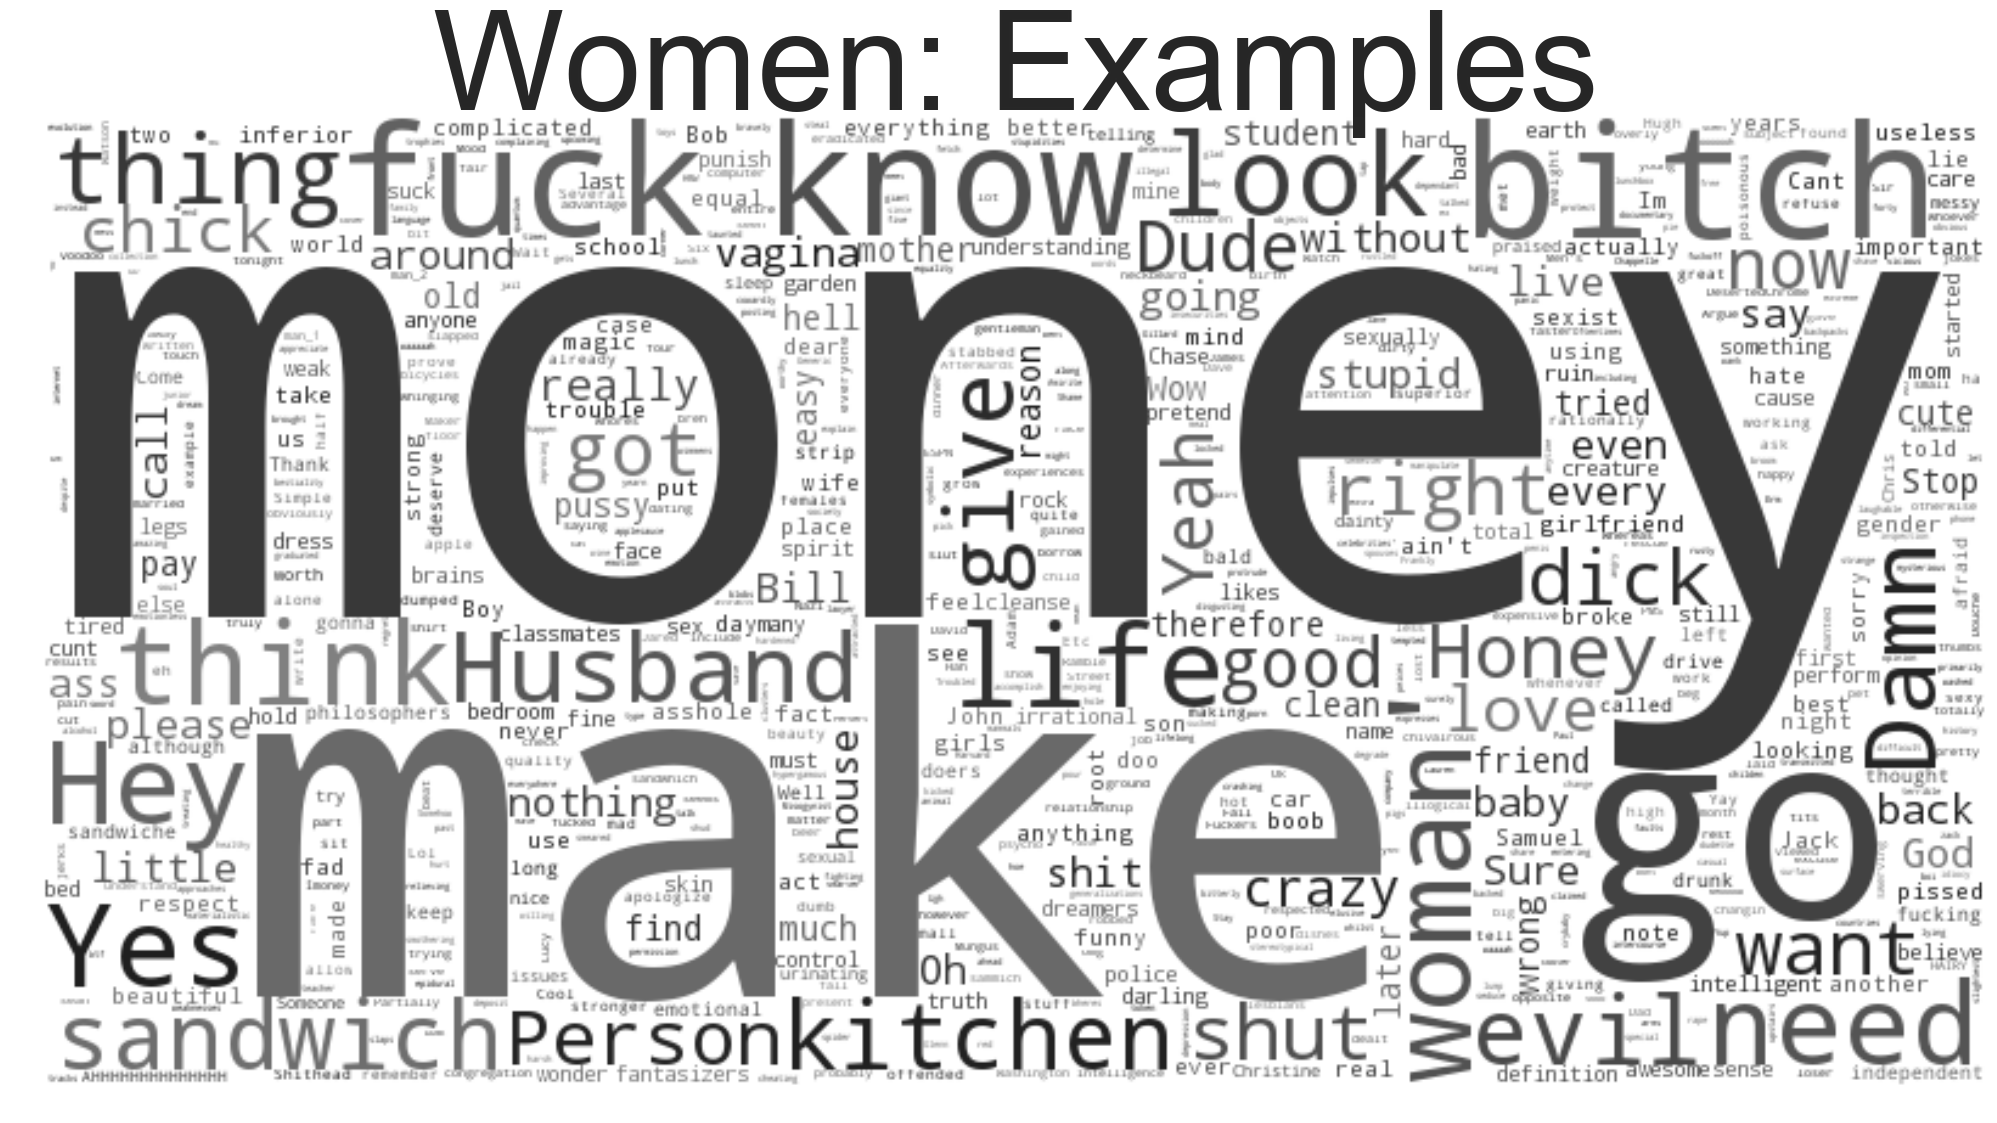

In [215]:
want = [item for item in womenEx if item not in stopwords]
want = " ".join(want)

#Generate WordCloud image
wc = WordCloud(background_color = "white", max_words=5000, stopwords=stopwords, width=800, height=400)

#Generate WordCloud
wc.generate(want)

#Coloring
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(50, 0%%, %d%%)" % random.randint(10, 50)

#Plotting
plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3))
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Women: Examples", size = 100)
plt.show()

In [194]:
women

[u"  Beings not seen or touched by 98% of the men who have posted on this subject thus far.  \r  Highly attracted to males of the species who are reasonable to look at, have jobs, are relatively kind, sometimes take out trash, and treat them like equals (not superiors, not inferiors -- equals.)  Happily give blowjobs in return.   \r  Prefer large dicks.  Secretly laugh at guys who convince themselves that size doesn't matter.  \r  Are paid seventy five cents for every dollar a man makes in the exact same job, same demographic, and same education level.\r  To those men who cannot procure them (because said men are too mean, stupid, sexist, ugly, and unaccomplished) they cause intense feelings of failure, hatred, prejudice, violence, and need to post on boards stereotyping all women with one narrow, negative definition.  Said men then jack off alone.    \r  When said beings reject such specimens of men or express an intelligent opinion, they are bitches.   \r  When they don't put out, th

In [193]:
our_list = ["women","men"]
for category in our_list: 
    this_text = category
    want = [item for item in this_text if item not in stopwords]
    want = " ".join(want)
    print item
    
    #Generate WordCloud image
    wc = WordCloud(background_color = "white", max_words=5000, stopwords=stopwords, width=800, height=400)

    #Generate WordCloud
    wc.generate(want)

    #Coloring
    def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(50, 0%%, %d%%)" % random.randint(10, 50)

    #Plotting
    plt.figure(figsize=(20,10))
    plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3))
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

n


IndexError: list index out of range

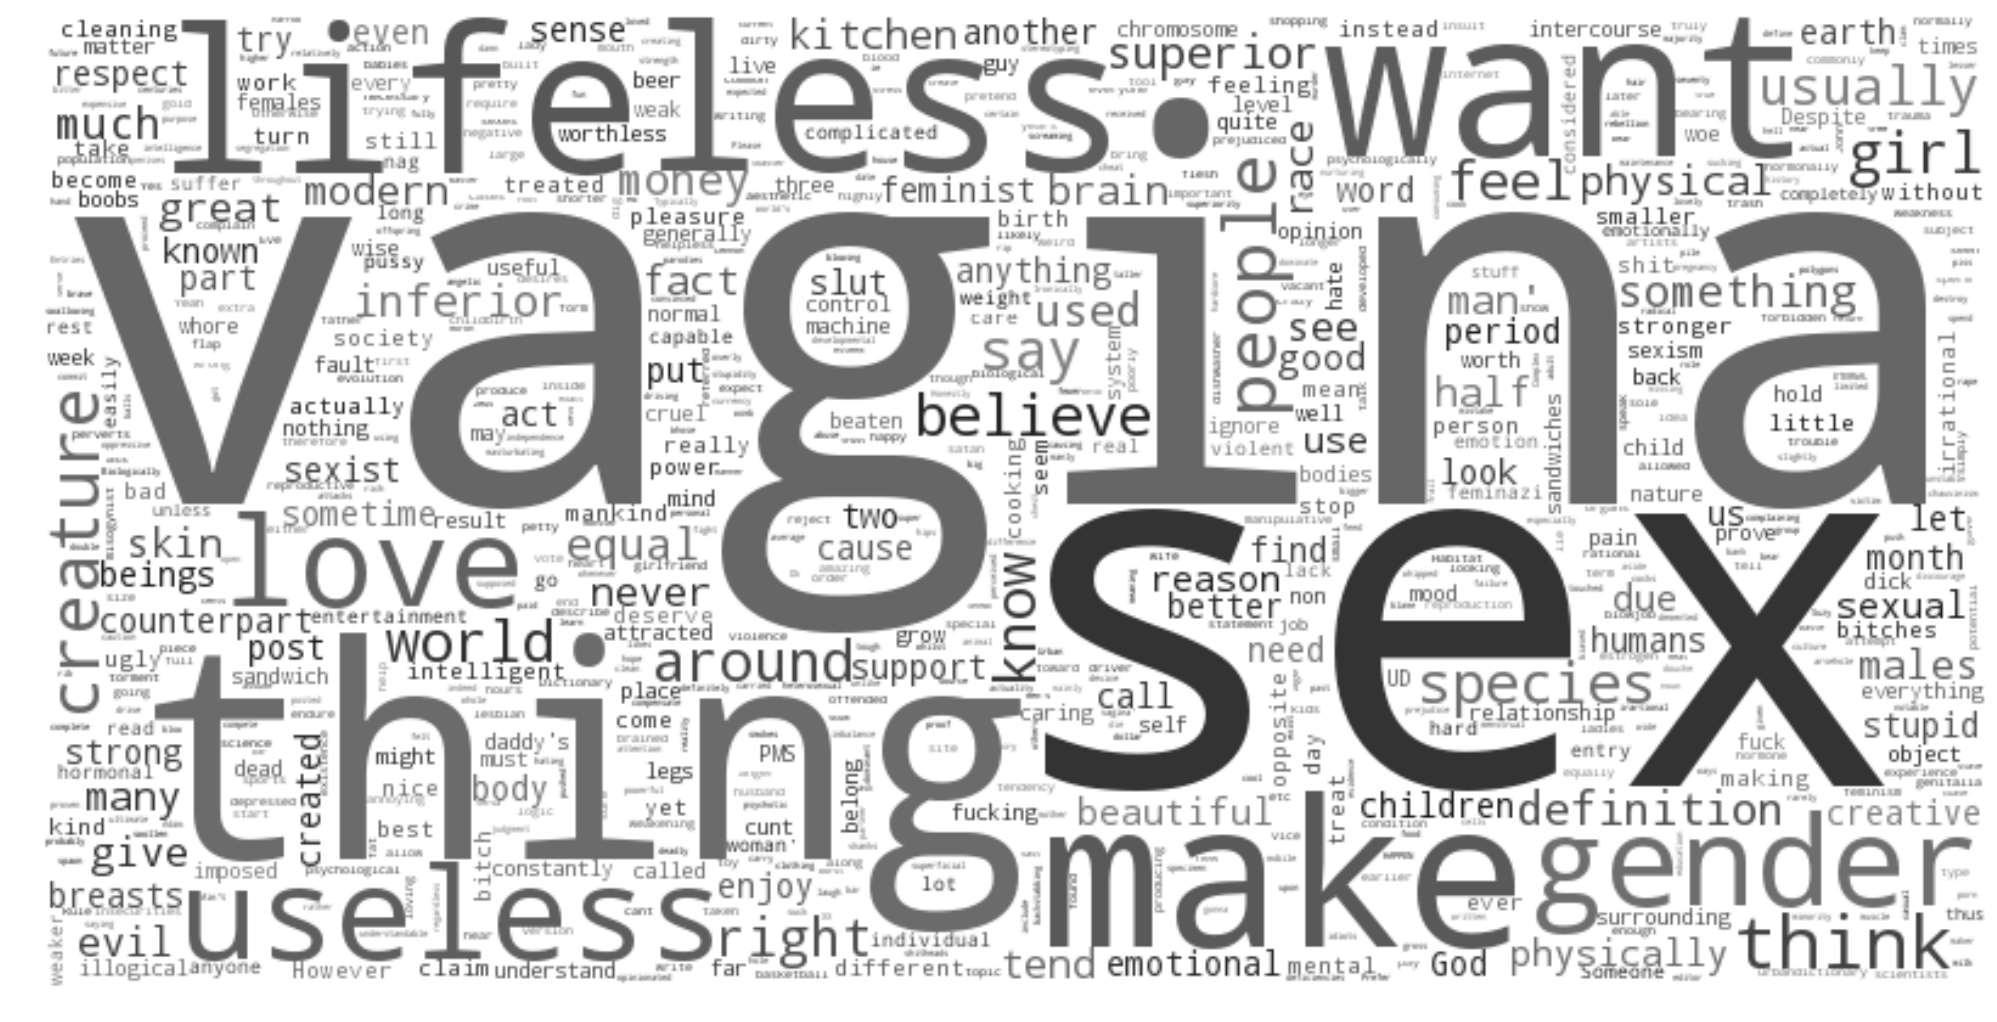

In [188]:
#our_list = ["women","men"]
want = [item for item in women if item not in stopwords]
want = " ".join(want)

#Generate WordCloud image
wc = WordCloud(background_color = "white", max_words=5000, stopwords=stopwords, width=800, height=400)

#Generate WordCloud
wc.generate(want)

#Coloring
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(50, 0%%, %d%%)" % random.randint(10, 50)

#Plotting
plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [6]:
leadership = pd.read_csv('leadership.csv') 
leadership.head()

,﻿CaseID,Q1,Q4A,Q4B,Q4C,Q4D,Q5A,Q5B,Q6A,Q6B,...,PPSTATEN,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PPWORK,PPNET,weight,duration
0,3.0,2,3,3,4,3,3,3,3,3,...,43,0,0,0,0,2,1,1,0.6284,91.0
1,4.0,1,1,1,2,1,3,3,3,3,...,59,0,0,0,0,2,1,1,1.0476,3.0
2,5.0,2,2,2,2,1,3,3,3,-1,...,14,0,1,0,0,1,7,1,1.5255,12.0
3,6.0,2,3,2,3,2,3,3,3,3,...,64,0,0,0,0,1,1,1,0.7028,9.0
4,7.0,1,3,2,3,2,3,3,2,1,...,54,0,0,0,0,1,1,1,1.0476,8.0


For our project, we want to answer the following questions. 
1. Does the Pew Research Center's survey on gender and leadership suggest that there is a discrepancy between perception and reality? Do people believe that men systematically outperform women? 
2. Which categories seem to have the most difference? 

Create graphs to show that women tend to respond the same as men 
get census wage data

In [ ]:
#Question 16 a-g: Women in top executive business positions

Part 2: Word cloud from urbandictionary/women and urbandictionary/leadership